In [1]:
"""
 BLACKOUT.ipynb

@author: Rafael L. da Silva, Oct. 6th, 2021
"""

import cv2
import os
from matplotlib import pyplot as plt
import time 
from utils import *
import copy
%matplotlib widget

# Last 3 digits of trial number
trial_num = '009_a'
# Filer address, where all data is located
root = r'/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial'+str(trial_num)
# Scan name to work with
Date='y21m03d30'
# Plant1, Plant2, Plant3, Plant4
Plant = 'Plant1'
# Scan identifier: 1 = Morning Scan, 2 = Afternoon Scan
Scan = 1
Scan = str(Scan)
# 1 - leaves, 2 - YEL
plant_part = 1
if plant_part == 1:
    portion = 'leaves'
else:
    Scan='2'
    portion = 'YEL'
    
src_norm = os.path.join(root, 'Patches', Plant, Date, 'Scans', Scan)
output_path = os.path.join(root, 'BlackedOut', Plant, Date, 'Scans', Scan)
if os.path.exists(output_path):
    os.makedirs(output_path)
# How many vertical steps for that Scan (it may vary specially between different trials)
v_step = 29
# List to keep track of first index of a vertical readings, it considers the first index and the last of the 2nd v. reading
# this list will be updated along the way when cutting the images
v_scan= [0, v_step]

In [2]:
# Pictures within a Session for a given Scan
list1=os.listdir(src_norm)
list1.sort()
list1

['0000.jpg',
 '0001.jpg',
 '0002.jpg',
 '0003.jpg',
 '0004.jpg',
 '0005.jpg',
 '0006.jpg',
 '0007.jpg',
 '0008.jpg',
 '0009.jpg',
 '0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0013.jpg',
 '0014.jpg',
 '0015.jpg',
 '0016.jpg',
 '0017.jpg',
 '0018.jpg',
 '0019.jpg',
 '0020.jpg',
 '0021.jpg',
 '0022.jpg',
 '0023.jpg',
 '0024.jpg',
 '0025.jpg',
 '0026.jpg',
 '0027.jpg',
 '0028.jpg',
 '0029.jpg',
 '0030.jpg',
 '0031.jpg',
 '0032.jpg',
 '0033.jpg',
 '0034.jpg',
 '0035.jpg',
 '0036.jpg',
 '0037.jpg',
 '0038.jpg',
 '0039.jpg',
 '0040.jpg',
 '0041.jpg',
 '0042.jpg',
 '0043.jpg',
 '0044.jpg',
 '0045.jpg',
 '0046.jpg',
 '0047.jpg',
 '0048.jpg',
 '0049.jpg',
 '0050.jpg',
 '0051.jpg',
 '0052.jpg',
 '0053.jpg',
 '0054.jpg',
 '0055.jpg',
 '0056.jpg',
 '0057.jpg',
 'YEL',
 'leaves']

In [3]:
# Initialize labeler object
blk_box_labeler = BlackLabel(v_step)
print('Current vertical step: {}'.format(blk_box_labeler.step))

Current vertical step: 29


In [4]:
# Horizontal step (ie. amount of pixels) that the loop will shift the black boxes to the left for you
h_step = 20

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			Plant1!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			New Pair Now!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Image index: 0, iteration index: 0
{}


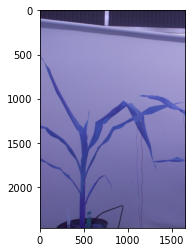

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1200
first y coordinate - the line on top:800
second y coordinate - the line at the bottom (max: 2464):1250
0
{0: [1200, 800, 1250, 'r']}


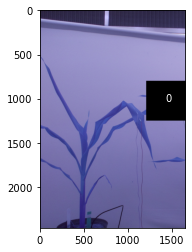

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 0
Block 0 has been deleted!
{}


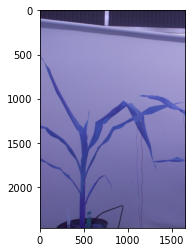

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1100
first y coordinate - the line on top:800
second y coordinate - the line at the bottom (max: 2464):1250
0
{0: [1100, 800, 1250, 'r']}


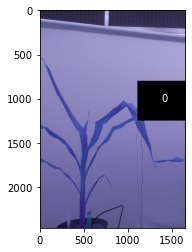

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1200
first y coordinate - the line on top:1600
second y coordinate - the line at the bottom (max: 2464):1800
0
1
{0: [1100, 800, 1250, 'r'], 1: [1200, 1600, 1800, 'r']}


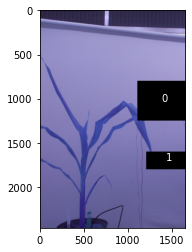

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1600
first y coordinate - the line on top:1700
second y coordinate - the line at the bottom (max: 2464):1800
0
1
2
{0: [1100, 800, 1250, 'r'], 1: [1200, 1600, 1800, 'r'], 2: [1600, 1700, 1800, 'r']}


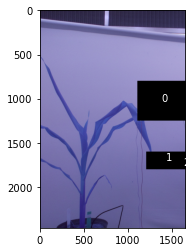

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 2
Block 2 has been deleted!
0
1
{0: [1100, 800, 1250, 'r'], 1: [1200, 1600, 1800, 'r']}


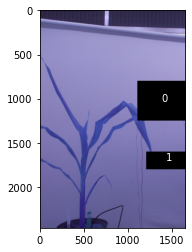

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 1
Block 1 has been deleted!
0
{0: [1100, 800, 1250, 'r']}


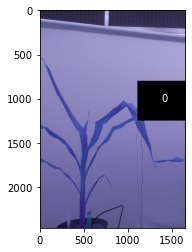

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1250
first y coordinate - the line on top:1600
second y coordinate - the line at the bottom (max: 2464):1800
0
1
{0: [1100, 800, 1250, 'r'], 1: [1250, 1600, 1800, 'r']}


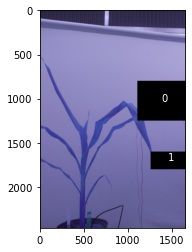

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 1, iteration index: 1
0
1
{0: [1100, 829, 1279, 'r'], 1: [1250, 1629, 1829, 'r']}


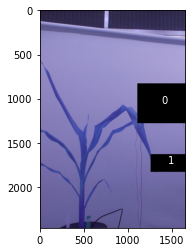

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 2, iteration index: 2
0
1
{0: [1100, 858, 1308, 'r'], 1: [1250, 1658, 1858, 'r']}


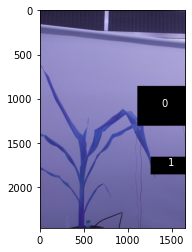

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 3, iteration index: 3
0
1
{0: [1100, 887, 1337, 'r'], 1: [1250, 1687, 1887, 'r']}


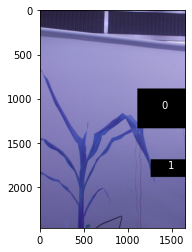

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 4, iteration index: 4
0
1
{0: [1100, 916, 1366, 'r'], 1: [1250, 1716, 1916, 'r']}


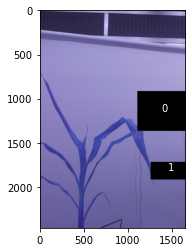

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 5, iteration index: 5
0
1
{0: [1100, 945, 1395, 'r'], 1: [1250, 1745, 1945, 'r']}


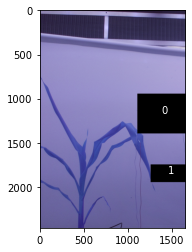

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 6, iteration index: 6
0
1
{0: [1100, 974, 1424, 'r'], 1: [1250, 1774, 1974, 'r']}


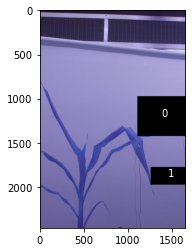

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 7, iteration index: 7
0
1
{0: [1100, 1003, 1453, 'r'], 1: [1250, 1803, 2003, 'r']}


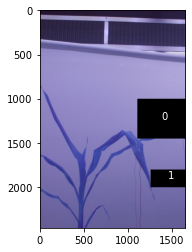

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 8, iteration index: 8
0
1
{0: [1100, 1032, 1482, 'r'], 1: [1250, 1832, 2032, 'r']}


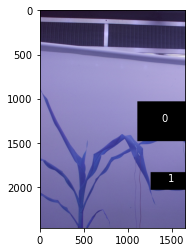

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 9, iteration index: 9
0
1
{0: [1100, 1061, 1511, 'r'], 1: [1250, 1861, 2061, 'r']}


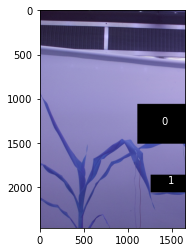

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 10, iteration index: 10
0
1
{0: [1100, 1090, 1540, 'r'], 1: [1250, 1890, 2090, 'r']}


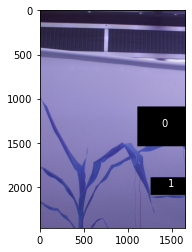

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 11, iteration index: 11
0
1
{0: [1100, 1119, 1569, 'r'], 1: [1250, 1919, 2119, 'r']}


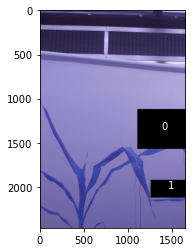

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 12, iteration index: 12
0
1
{0: [1100, 1148, 1598, 'r'], 1: [1250, 1948, 2148, 'r']}


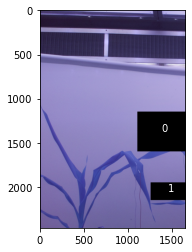

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 1
Block 1 has been deleted!
0
{0: [1100, 1148, 1598, 'r']}


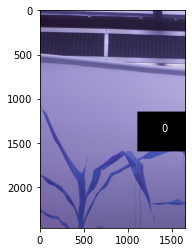

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?1250
WAKE UP!! Incorrect input!!! Try again!!
Image index: 13, iteration index: 13
0
{0: [1100, 1148, 1598, 'r']}


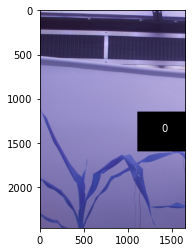

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?1250
WAKE UP!! Incorrect input!!! Try again!!
Image index: 14, iteration index: 14
0
{0: [1100, 1148, 1598, 'r']}


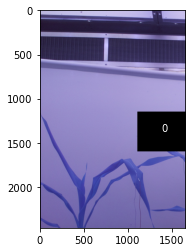

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1250
first y coordinate - the line on top:2300
second y coordinate - the line at the bottom (max: 2464):2400
0
1
{0: [1100, 1148, 1598, 'r'], 1: [1250, 2300, 2400, 'r']}


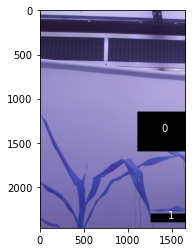

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 1
Block 1 has been deleted!
0
{0: [1100, 1148, 1598, 'r']}


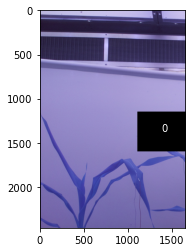

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1250
first y coordinate - the line on top:2100
second y coordinate - the line at the bottom (max: 2464):2300
0
1
{0: [1100, 1148, 1598, 'r'], 1: [1250, 2100, 2300, 'r']}


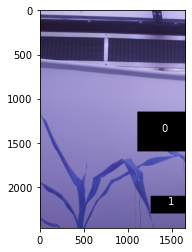

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 15, iteration index: 15
0
1
{0: [1100, 1177, 1627, 'r'], 1: [1250, 2129, 2329, 'r']}


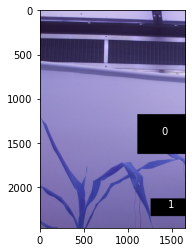

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 16, iteration index: 16
0
1
{0: [1100, 1206, 1656, 'r'], 1: [1250, 2158, 2358, 'r']}


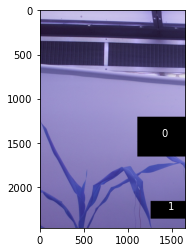

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 17, iteration index: 17
0
1
{0: [1100, 1235, 1685, 'r'], 1: [1250, 2187, 2387, 'r']}


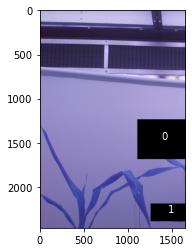

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 18, iteration index: 18
0
1
{0: [1100, 1264, 1714, 'r'], 1: [1250, 2216, 2416, 'r']}


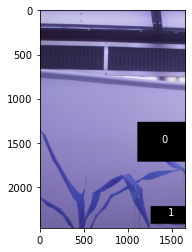

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 19, iteration index: 19
0
1
{0: [1100, 1293, 1743, 'r'], 1: [1250, 2245, 2445, 'r']}


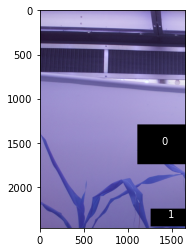

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 0
Block 0 has been deleted!
1
{1: [1250, 2245, 2445, 'r']}


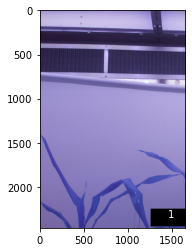

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: 1100
What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1100
first y coordinate - the line on top:1500
second y coordinate - the line at the bottom (max: 2464):1800
1
2
{1: [1250, 2245, 2445, 'r'], 2: [1100, 1500, 1800, 'r']}


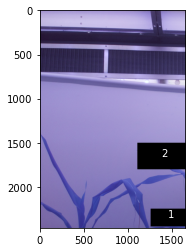

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 2
Block 2 has been deleted!
1
{1: [1250, 2245, 2445, 'r']}


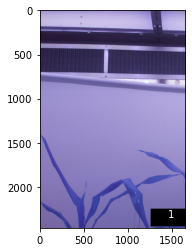

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1100
first y coordinate - the line on top:1500
second y coordinate - the line at the bottom (max: 2464):2950
1
2
{1: [1250, 2245, 2445, 'r'], 2: [1100, 1500, 2950, 'r']}


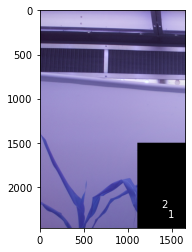

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: d
Now we are DELETING a block!!
What's the block ID? 2
Block 2 has been deleted!
1
{1: [1250, 2245, 2445, 'r']}


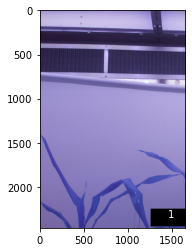

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: a
Now we are ADDING a block!!
Left (Type 'L' or 'l') or Right (Type 'R' or 'r')?r
x coordinate (max: 1650):1100
first y coordinate - the line on top:1500
second y coordinate - the line at the bottom (max: 2464):1950
1
2
{1: [1250, 2245, 2445, 'r'], 2: [1100, 1500, 1950, 'r']}


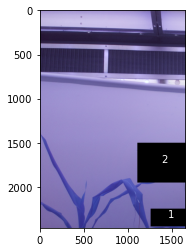

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 20, iteration index: 20
1
2
{1: [1250, 2274, 2464, 'r'], 2: [1100, 1529, 1979, 'r']}


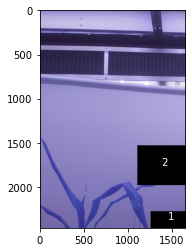

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 21, iteration index: 21
1
2
{1: [1250, 2303, 2464, 'r'], 2: [1100, 1558, 2008, 'r']}


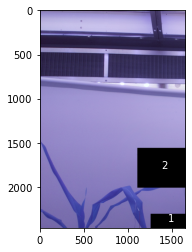

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 22, iteration index: 22
1
2
{1: [1250, 2332, 2464, 'r'], 2: [1100, 1587, 2037, 'r']}


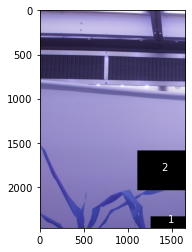

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 23, iteration index: 23
1
2
{1: [1250, 2361, 2464, 'r'], 2: [1100, 1616, 2066, 'r']}


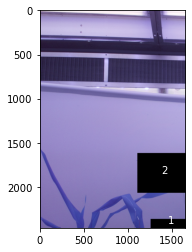

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 24, iteration index: 24
1
2
{1: [1250, 2390, 2464, 'r'], 2: [1100, 1645, 2095, 'r']}


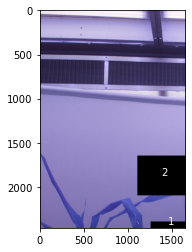

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 25, iteration index: 25
1
2
{1: [1250, 2419, 2464, 'r'], 2: [1100, 1674, 2124, 'r']}


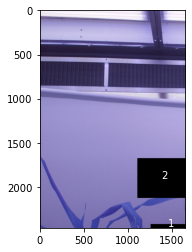

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 26, iteration index: 26
1
2
{1: [1250, 2448, 2464, 'r'], 2: [1100, 1703, 2153, 'r']}


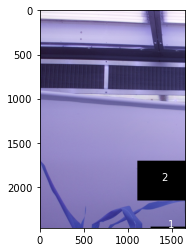

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
y coordinate is beyond figure limits, removing block 1
Image index: 27, iteration index: 27
2
{2: [1100, 1732, 2182, 'r']}


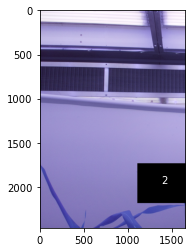

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			New Pair Now!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Image index: 29, iteration index: 29
0
1
{0: [1080, 829, 1279, 'r'], 1: [1230, 1629, 1829, 'r']}


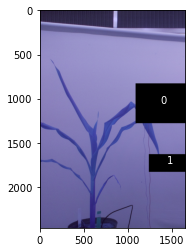

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 30, iteration index: 30
0
1
{0: [1080, 858, 1308, 'r'], 1: [1230, 1658, 1858, 'r']}


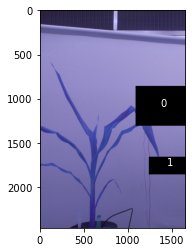

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 31, iteration index: 31
0
1
{0: [1080, 887, 1337, 'r'], 1: [1230, 1687, 1887, 'r']}


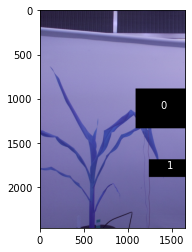

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: n
NEXT picture is coming!
Image index: 32, iteration index: 32
0
1
{0: [1080, 916, 1366, 'r'], 1: [1230, 1716, 1916, 'r']}


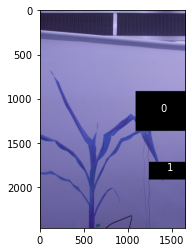

What do you want to do? (A)dd a block, (D)elete a block, (N)ext picture!, (Q)uit: q


In [5]:
%matplotlib inline

print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('\t\t\t{}!!!!!'.format(Plant))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

# Initialize variable
inp = ''
# This will iterate untill the second index is greater than the amount of pictures within the dir
while v_scan[1] < len(list1) and (inp != 'Q' and inp != 'q'):
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('\t\t\tNew Pair Now!!!!!')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    current_img_indices = [i for i in range(v_scan[0], v_scan[1])]
    # Change here if you want to "rewind"
    i = current_img_indices[0]
    limit = current_img_indices[-1]
    while i < limit and (inp != 'Q' and inp != 'q'):
        # Test if picture is within expected range and Q was not pressed yet
        # im_idx = int(list1[i][:4])
        im_idx = int(list1[i][-10:-4])
        print('Image index: {}, iteration index: {}'.format(im_idx, i))
        if (im_idx >= v_scan[0] or im_idx <= v_scan[1]) and (inp != 'Q' and inp != 'q'):
            im_path = os.path.join(src_norm, list1[i])
            if os.path.exists(im_path) and (inp != 'Q' and inp != 'q'):
                im = cv2.imread(im_path)
                inp = blk_box_labeler.create_black_block(im)
                # if it is the image taken at the bottom
                if i == current_img_indices[0]:
                    temp_dict = copy.deepcopy(blk_box_labeler.block_dict)
        elif inp == 'Q' or inp == 'q':
            print('Quiting...')
            break
        else:
            print([int(list1[i][-10:-4]), int(list1[i][-10:-4])])
            print('skipped')
        i += 1
        
    # Update horizontal step for all created blocks
    for key in temp_dict:
        
        if temp_dict[key][0] - h_step < 0:
            temp_dict[key][0] = 0
        else:
            temp_dict[key][0] -= h_step

    # Restore first boxes to ease blocking with updated locations    
    blk_box_labeler.block_dict = copy.deepcopy(temp_dict)
    
    # Look at next v_scan without overlap
    v_scan[0] = v_scan[1]
    v_scan[1] = v_scan[1] + v_step